In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data=pd.read_csv('births.csv')
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Qno1.Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc

In [55]:
data['decade'] = (data['year'] // 10) * 10

# Display the DataFrame
data

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


Q.2: Show the descriptive statistics of the data.

In [56]:
data.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
 5   decade  15547 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 728.9+ KB


Q.3: Check if your data contains any missing values


In [58]:
data.isna()

,year,month,day,gender,births,decade
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
15542,False,False,True,False,False,False
15543,False,False,True,False,False,False
15544,False,False,True,False,False,False
15545,False,False,True,False,False,False


In [59]:
data.isna().sum()

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

Q.4: What is the trend of male & female births every decade?


C:\Users\Najeeb\AppData\Local\Temp\ipykernel_10268\1731943699.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=data,x='decade',y='births',hue='gender',hue_order=["M","F"],ci=False)


Text(0.5, 1.0, 'Trend of male female birth every decade')

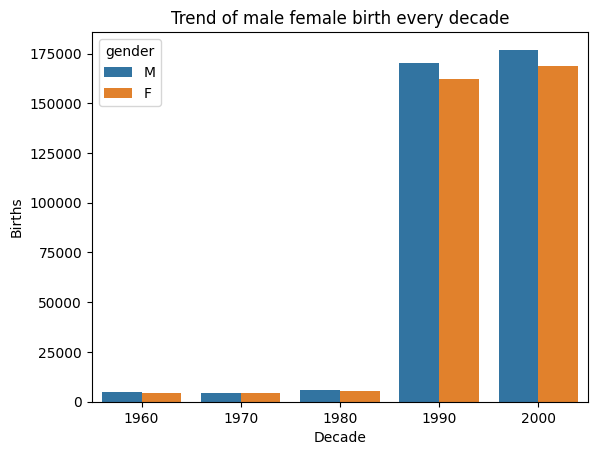

In [60]:
import seaborn as sns
plt.figsize=(10,5)
sns.barplot(data=data,x='decade',y='births',hue='gender',hue_order=["M","F"],ci=False)
plt.xlabel("Decade")
plt.ylabel("Births")
plt.title("Trend of male female birth every decade")

Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5
standard deviations from the mean.This is a common statistical technique used to focus on the central
tendency of the data while excluding extreme values.


In [61]:
# Calculate mean and standard deviation
mean_value = data['births'].mean()
std_value = data['births'].std()

# Define the range for not considering outliers
lower_limit = mean_value - 5 * std_value
upper_limit = mean_value + 5 * std_value

# Filter out outliers
filtered_df = data[(data['births'] >= lower_limit) & (data['births'] <= upper_limit)]
rows_removed = data.shape[0] - filtered_df.shape[0]

print(f'No of Rows Removed: {rows_removed}')

No of Rows Removed: 461


Q.7: Group the data by month and day separately


In [62]:
month_data=data.groupby('month')["births"].sum().reset_index()
month_data

,month,births
0,1,12364197
1,2,11541178
2,3,12678844
3,4,12085891
4,5,12624972
5,6,12521070
6,7,13367556
7,8,13528007
8,9,13252831
9,10,12954950


In [63]:
day_data=data.groupby('day')["births"].sum().reset_index()
day_data

,day,births
0,1.0,2286854
1,2.0,2303168
2,3.0,2309087
3,4.0,2286588
4,5.0,2296951
5,6.0,2308073
6,7.0,2314081
7,8.0,2322376
8,9.0,2315055
9,10.0,2327197


In [64]:
daily_birth=data.groupby(['month',"day"])["births"].sum().reset_index()
month_data

,month,births
0,1,12364197
1,2,11541178
2,3,12678844
3,4,12085891
4,5,12624972
5,6,12521070
6,7,13367556
7,8,13528007
8,9,13252831
9,10,12954950


Focusing on the month and day only, you have a time series reflecting the average number of
births by date of the year. From this, plot the data.

In [65]:
avrage_birthrate=data.groupby(['month',"day"])["births"].sum().reset_index()
avrage_birthrate

,month,day,births
0,1,1.0,160369
1,1,2.0,169896
2,1,3.0,180036
3,1,4.0,182854
4,1,5.0,184145
...,...,...,...
379,12,28.0,201768
380,12,29.0,204806
381,12,30.0,206894
382,12,31.0,194368
